In [30]:
import numpy as np  # NumPy is for numerical computations, such as handling mathematical and array operations.
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations.
import seaborn as sns  # Seaborn is a library for making an interface to draw attractive and informative statistical graphics.
import pandas as pd  # Manipulation and analysis of data with Pandas, including data structures such as DataFrames.

# Loading , processing historical price data
# dataset typically contains information about financial instruments such as forex, stock, or commodity prices.
data = pd.read_csv("/content/historical_prices_.csv")

# Preprocessing
# Converting the 'Date' column to datetime format to enable sorting and filtering.
data['Date'] = pd.to_datetime(data['Date'])

# Organizing by chronological order ensuring accurate time-series analysis.
data.sort_values(by='Date', inplace=True)  # Sorting ensures that the dataset is in sequential order for proper trend analysis.

# 'Date' column to simplify data filtering and time-based operations.
# Setting 'Date' as the index allows direct access to date-specific rows.
data.set_index('Date', inplace=True)

# Handlin values that are missing
#This ensures no gaps in data continuity by propagating the last valid observation forward.
data['Close'].fillna(method='ffill', inplace=True)

# Calculating daily percentage changes for the 'Close' column to analyze market volatility.
data['Daily Change (%)'] = data['Close'].pct_change() * 100

# Display the first few rows of the processed dataset to verify data preprocessing steps.
data.head()


<ipython-input-30-479e2bfadfac>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
<ipython-input-30-479e2bfadfac>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Daily Change (%)
Date,,,,,,,
2023-11-06,1.2372,1.2429,1.2367,1.2374,1.2374,NaN,NaN
2023-11-07,1.2344,1.2348,1.2277,1.2346,1.2346,NaN,-0.226281
2023-11-08,1.2290,1.2301,1.2243,1.2292,1.2292,NaN,-0.437389
2023-11-09,1.2286,1.2309,1.2254,1.2285,1.2285,NaN,-0.056948
2023-11-10,1.2216,1.2238,1.2189,1.2217,1.2217,NaN,-0.553521


In [4]:
# Step 2: Analytical Techniques
# After preprocessing the data, the next step is to apply analytical methods:

# 1. Trend Analysis
# 2. Volatility Analysis

# First,  i calculate the moving averages:

# Computing
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Display the first 25 rows of 'Close', 'MA20', and 'MA50' columns to inspect the results
data[['Close', 'MA20', 'MA50']].head(25)


,Close,MA20,MA50
Date,,,
2023-11-06,1.2374,NaN,NaN
2023-11-07,1.2346,NaN,NaN
2023-11-08,1.2292,NaN,NaN
2023-11-09,1.2285,NaN,NaN
2023-11-10,1.2217,NaN,NaN
2023-11-13,1.2228,NaN,NaN
2023-11-14,1.2281,NaN,NaN
2023-11-15,1.2495,NaN,NaN
2023-11-16,1.2422,NaN,NaN


In [5]:
# Step 3: Volatility Analysis

# window size for Bollinger Bands
window = 20  # 20-day rolling window
std_dev = 2  # Multiplier for standard deviation

# Computing
data['BB_upper'] = data['MA20'] + (data['Close'].rolling(window=window).std() * std_dev)
data['BB_lower'] = data['MA20'] - (data['Close'].rolling(window=window).std() * std_dev)

# Displaying the first 25 rows of 'Close', 'BB_upper', and 'BB_lower' columns to check the results
data[['Close', 'BB_upper', 'BB_lower']].head(25)


,Close,BB_upper,BB_lower
Date,,,
2023-11-06,1.2374,NaN,NaN
2023-11-07,1.2346,NaN,NaN
2023-11-08,1.2292,NaN,NaN
2023-11-09,1.2285,NaN,NaN
2023-11-10,1.2217,NaN,NaN
2023-11-13,1.2228,NaN,NaN
2023-11-14,1.2281,NaN,NaN
2023-11-15,1.2495,NaN,NaN
2023-11-16,1.2422,NaN,NaN


In [6]:
# gaining further insights into volatility.

#  RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)

    # Separating gains (positive changes) and losses (negative changes)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculating the Relative Strength
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))  # Formula to calculate RSI

    return rsi

# Computing the RSI for the data
data['RSI'] = calculate_rsi(data)

# Display the first 25 rows of 'Close' and 'RSI' to inspect the results
data[['Close', 'RSI']].head(25)


,Close,RSI
Date,,
2023-11-06,1.2374,NaN
2023-11-07,1.2346,NaN
2023-11-08,1.2292,NaN
2023-11-09,1.2285,NaN
2023-11-10,1.2217,NaN
2023-11-13,1.2228,NaN
2023-11-14,1.2281,NaN
2023-11-15,1.2495,NaN
2023-11-16,1.2422,NaN


In [7]:
# statsmodels

from statsmodels.tsa.stattools import adfuller

# Applying the Augmented Dickey-Fuller test to the 'Close' column, removing any missing values
adf_test = adfuller(data['Close'].dropna())

# Outputting the results of the ADF test
print("ADF Test Statistic:", adf_test[0])  # ADF test statistic
print("p-value:", adf_test[1])  # p-value corresponding to the test
print("Critical Values:", adf_test[4])  # Critical values for different significance levels


if adf_test[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")


ADF Test Statistic: -2.160408989332967
p-value: 0.22092707504017556
Critical Values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
The time series is not stationary (fail to reject the null hypothesis).


In [14]:
# Importing the Shapiro-Wilk test from scipy to check for normality

from scipy.stats import shapiro

# Performing the Shapiro-Wilk test on the 'Daily Change (%)' column, removing any missing values
# The column name was 'Daily Change (%)', not 'Daily Change %'
stat, p = shapiro(data['Daily Change (%)'].dropna())

# Print the test statistic and p-value from the Shapiro-Wilk test
print("Shapiro-Wilk Test Statistic:", stat)  # The test statistic value
print("p-value:", p)  # The p-value indicating the probability of the data following a normal distribution

Shapiro-Wilk Test Statistic: 0.9195141706226525
p-value: 3.6183301221216447e-10


In [18]:
# Importin the t-test from scipy to compare means between two groups

from scipy.stats import ttest_ind

# Define a date to split the data into two periods
split_date = '2023-01-01'

# Split the data into two subsets: before and after the defined date
# Corrected column name from 'Daily Change %' to 'Daily Change (%)'
pre_split = data[data.index < split_date]['Daily Change (%)'].dropna()  # Data before the split date
post_split = data[data.index >= split_date]['Daily Change (%)'].dropna()  # Data after the split date

# Perform the t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(pre_split, post_split)

# Output the t-test results
print("T-Test Statistic:", t_stat)  # The calculated t-statistic value
print("p-value:", p_value)  # The p-value indicating the likelihood of observing the difference by chance

# Interpretation
if p_value <= 0.05:
    print("There is a significant difference in volatility before and after the split date.")
else:
    print("There is no significant difference in volatility before and after the split date.")

T-Test Statistic: nan
p-value: nan
There is no significant difference in volatility before and after the split date.


In [19]:
# Importingg the ARIMA model from statsmodels

from statsmodels.tsa.arima.model import ARIMA

# first fit the ARIMA model to the 'Close' price data, with the specified order (p, d, q)
model = ARIMA(data['Close'], order=(1, 1, 1))  # ARIMA(p, d, q) parameters can be adjusted
arima_result = model.fit()  # Fit the model to the data

# Printing the summary of the ARIMA model to examine its performance and parameters
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  243
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 915.864
Date:                Thu, 02 Jan 2025   AIC                          -1825.729
Time:                        09:02:33   BIC                          -1815.262
Sample:                             0   HQIC                         -1821.512
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1235      1.005     -0.123      0.902      -2.093       1.846
ma.L1          0.0520      1.006      0.052      0.959      -1.919       2.023
sigma2      3.018e-05   1.41e-06     21.348      0.0

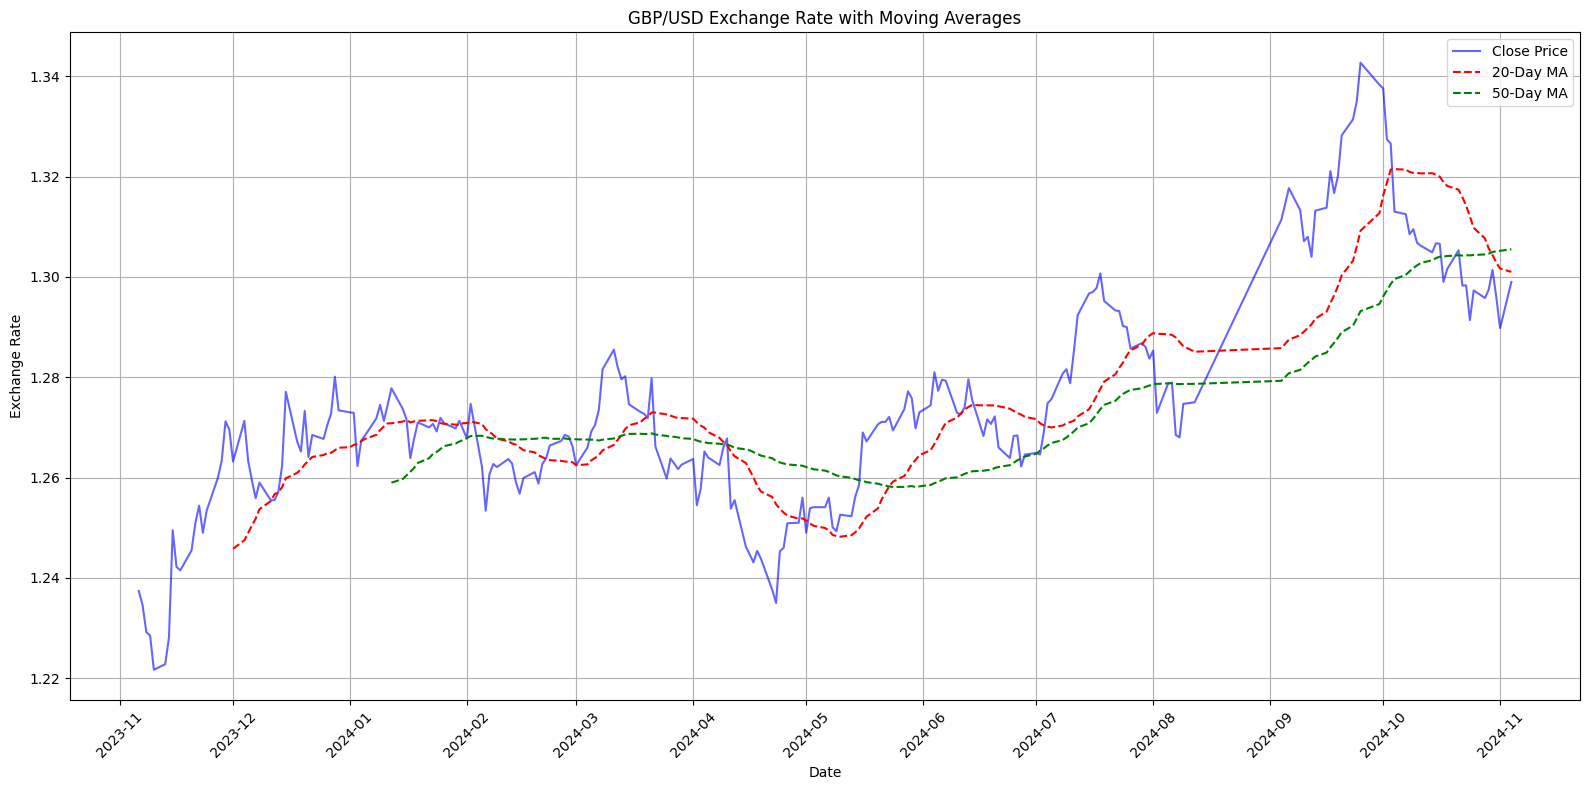

In [20]:
# Importting the necessary library for date formatting on the x-axis
import matplotlib.dates as mdates

# Line Chart
plt.figure(figsize=(16, 8))  # Change figure size to make it wider
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.6)  # 'Close' price with blue color and slight transparency
plt.plot(data.index, data['MA20'], label='20-Day MA', color='red', linestyle='--')  # 20-day moving average with red dashed line
plt.plot(data.index, data['MA50'], label='50-Day MA', color='green', linestyle='--')  #50-day moving average with green dashed line

# Adding titles
plt.title('GBP/USD Exchange Rate with Moving Averages')  #
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Exchange Rate')  # Label for the y-axis

# Display legend to label the different lines
plt.legend()

plt.grid(True)

# Set the format and locator for the x-axis date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format x-axis labels as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks at monthly intervals
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Adjusting the layout to avoid clipping of labels
plt.tight_layout()

plt.show()


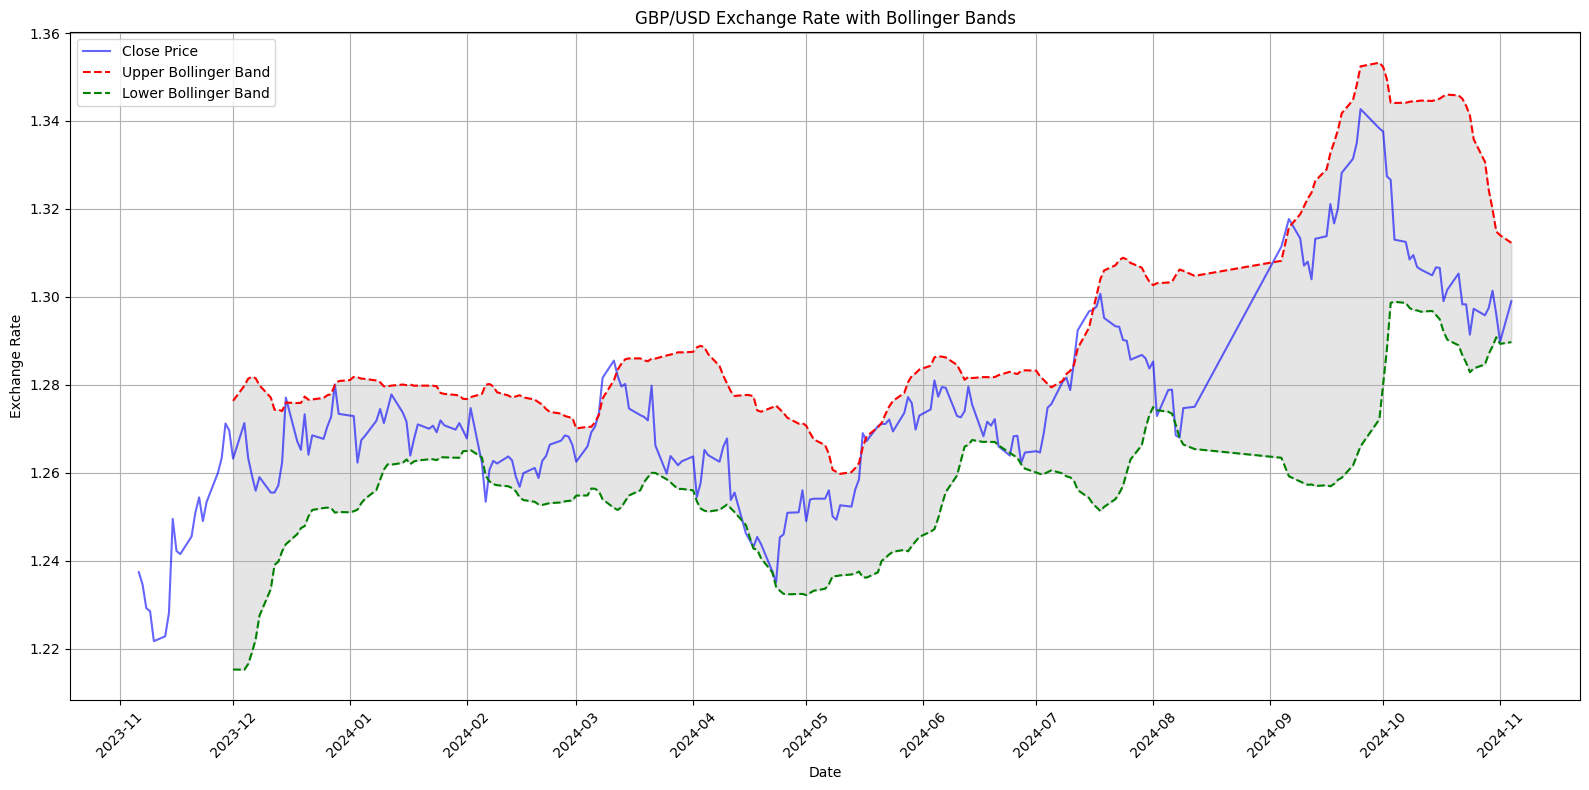

In [21]:
# Importting the necessary library for date formatting on the x-axis
import matplotlib.dates as mdates

# Bollinger Bands Plot
plt.figure(figsize=(16, 8))  # Change figure size to make it wider
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.6)  # Plot 'Close' price with blue color and slight transparency
plt.plot(data.index, data['BB_upper'], label='Upper Bollinger Band', color='red', linestyle='--')  # Plot upper Bollinger Band with red dashed line
plt.plot(data.index, data['BB_lower'], label='Lower Bollinger Band', color='green', linestyle='--')  # Plot lower Bollinger Band with green dashed line

plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='gray', alpha=0.2)

# Adding titles and labels
plt.title('GBP/USD Exchange Rate with Bollinger Bands')
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Exchange Rate')  # Label for the y-axis

# Display legend to label the different lines
plt.legend()

plt.grid(True)

# Set the format and locator for the x-axis date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


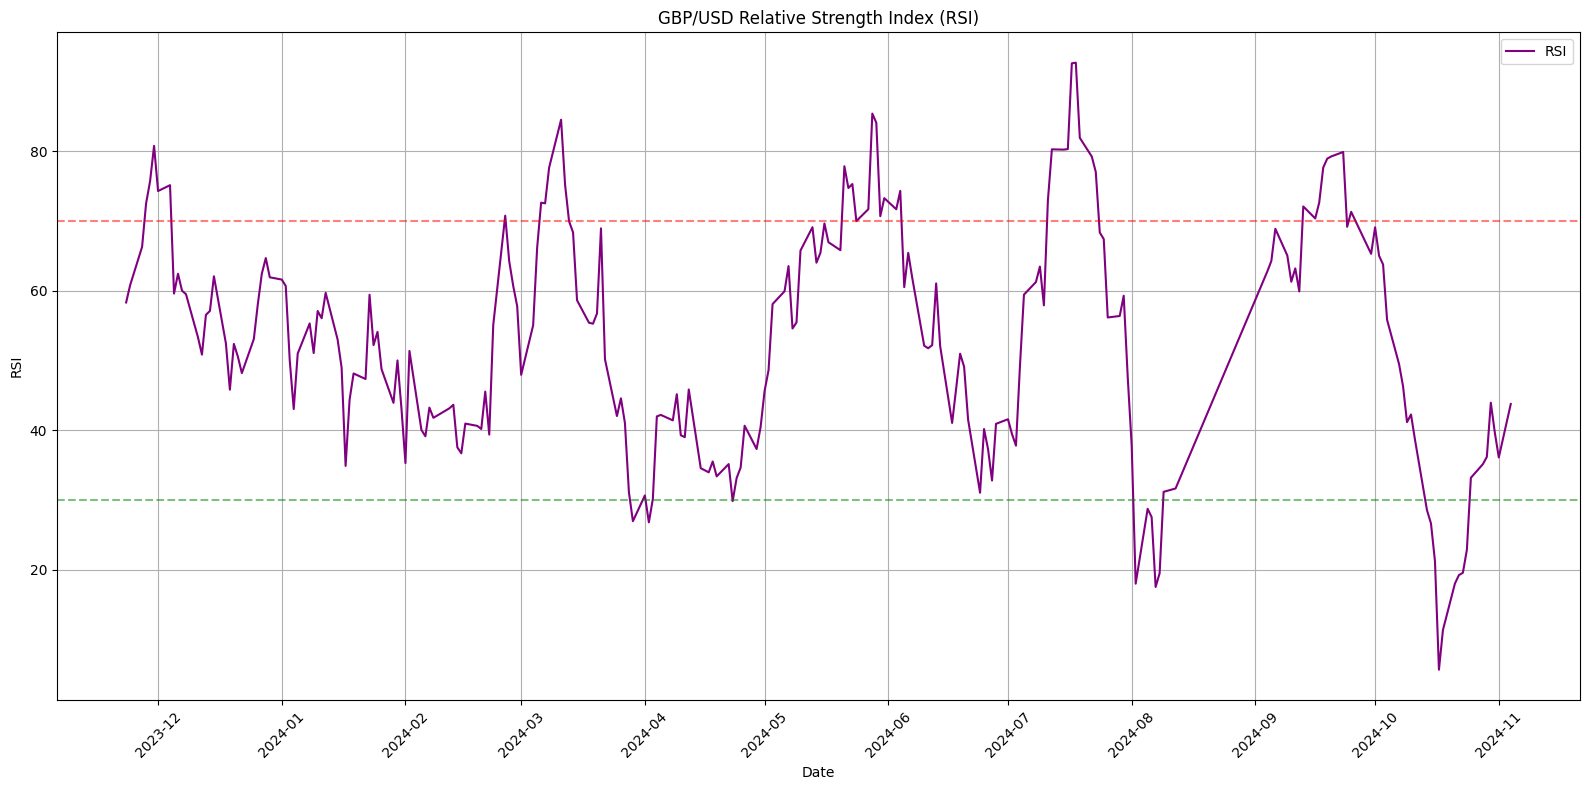

In [22]:
# Importting the necessary library for date formatting on the x-axis
import matplotlib.dates as mdates

# (RSI)
plt.figure(figsize=(16, 8))  # wider
plt.plot(data.index, data['RSI'], label='RSI', color='purple')  # Plot the RSI with purple color
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Add a horizontal line at 70 (overbought level)
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Add a horizontal line at 30 (oversold level)

plt.title('GBP/USD Relative Strength Index (RSI)')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('RSI')  # Label for the y-axis

# Displaying legend to label the RSI and lines
plt.legend()

plt.grid(True)

# Set the format and locator for the x-axis date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()


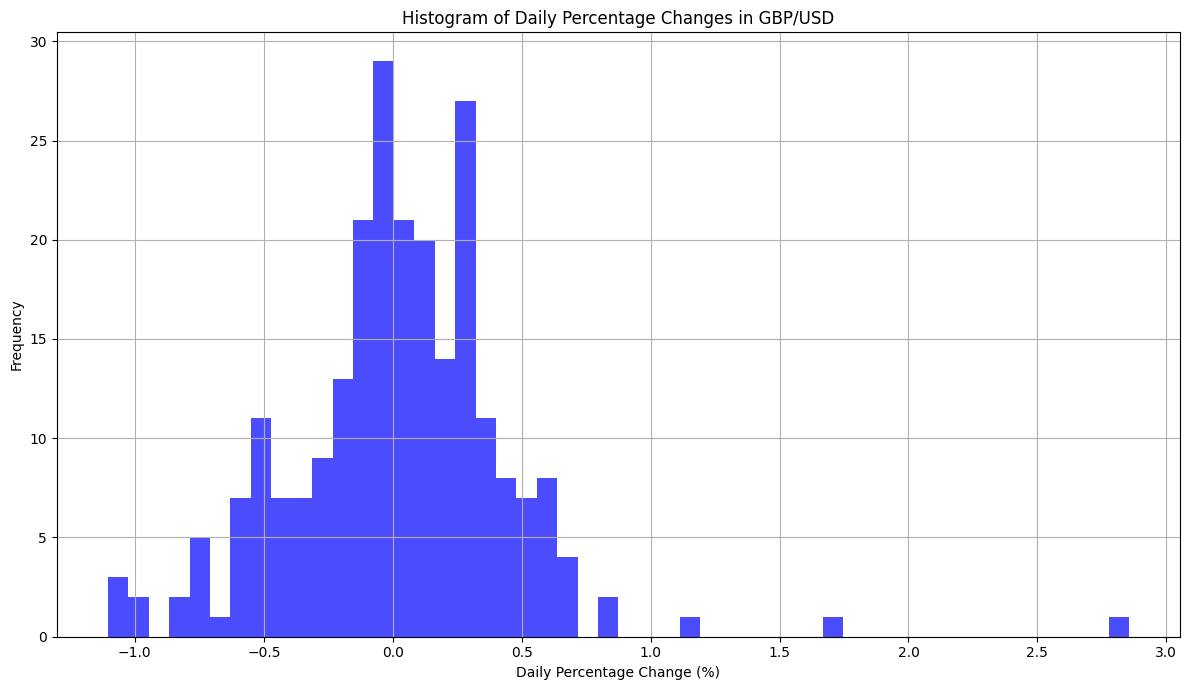

In [24]:
# Calculating the daily percentage change
data['Daily Change %'] = data['Close'].pct_change() * 100  # Compute the percentage change in the 'Close' price from one day to the next and multiply by 100 to express it as a percentage

# Plotting the Histogram of Daily Percentage Changes
plt.figure(figsize=(12, 7))
plt.hist(data['Daily Change %'].dropna(), bins=50, color='blue', alpha=0.7)  # Create  the 'Daily Change %' column, dropping any NaN values, with 50 bins, blue color, and slight transparency (alpha = 0.7)

# Adding titles and labels
plt.title('Histogram of Daily Percentage Changes in GBP/USD')
plt.xlabel('Daily Percentage Change (%)')
plt.ylabel('Frequency')  # Set the label for the y-axis, representing how often each percentage change occurs

plt.grid(True)  # Add a grid to the plot to help visualize the data better

# Adjusting the layout to avoid clipping of labels and ensure everything fits nicely
plt.tight_layout()

# Display the plot
plt.show()  # Show the plot to the user


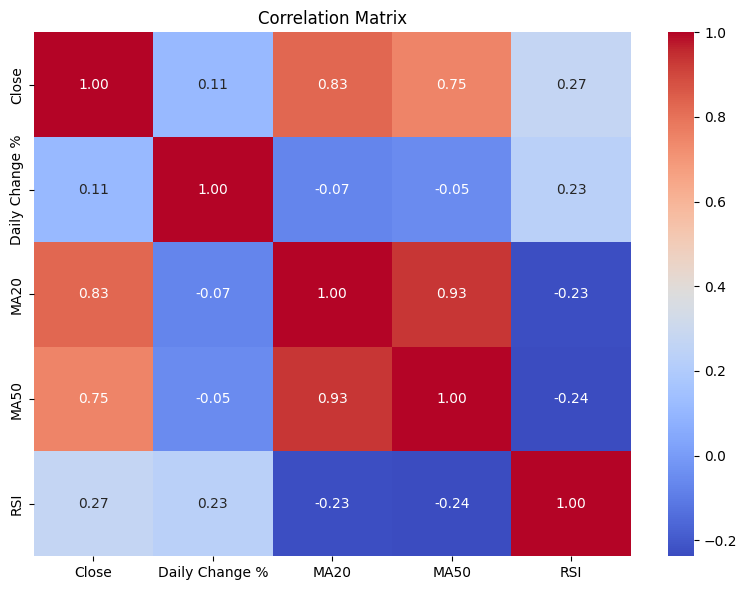

In [25]:
# Correlation Matrix Plot
plt.figure(figsize=(8, 6))  # Set the figure size to (8, 6) for a more compact plot

# Calculating the correlation matrix for the selected columns
correlation_matrix = data[['Close', 'Daily Change %', 'MA20', 'MA50', 'RSI']].corr()  # Get correlation values between 'Close', 'Daily Change %', 'MA20', 'MA50', and 'RSI'

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # seaborn's heatmap to display the correlation matrix, with annotations, color map 'coolwarm', and formatting for float values to 2 decimal places

# Adding title to the heatmap
plt.title('Correlation Matrix')  # Set the title of the plot

# Adjusting layout to make sure the plot looks clean and well-spaced
plt.tight_layout()

# Displaying the heatmap
plt.show()  # Show the plot to the user


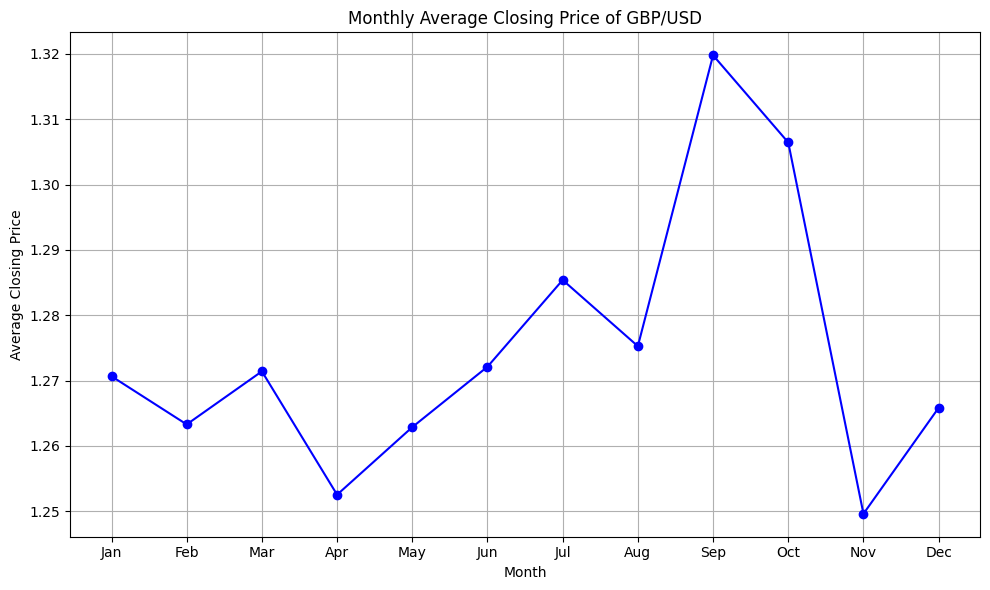

In [26]:
# Monthly Mean Prices
data['Month'] = data.index.month  # Extractin the month from the index and create a new 'Month' column
monthly_mean = data.groupby('Month')['Close'].mean()  # to group the data by month and calculate the average closing price for each month

# Line Chart of Monthly Trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', color='blue')  # Plot the monthly average closing prices with markers ('o') and blue color

# Adding titles and labels
plt.title('Monthly Average Closing Price of GBP/USD')
plt.xlabel('Month')  #  the x-axis as 'Month'
plt.ylabel('Average Closing Price')  #  the y-axis as 'Average Closing Price'

# Enabling grid for better readability
plt.grid(True)  # Add grid lines to make the plot more readable

# Customizing x-axis ticks to represent month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis tick marks to represent month names

# Adjust the layout to make sure the plot fits without cutting off elements
plt.tight_layout()

# Display the plot
plt.show()  # Show the plot to the user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


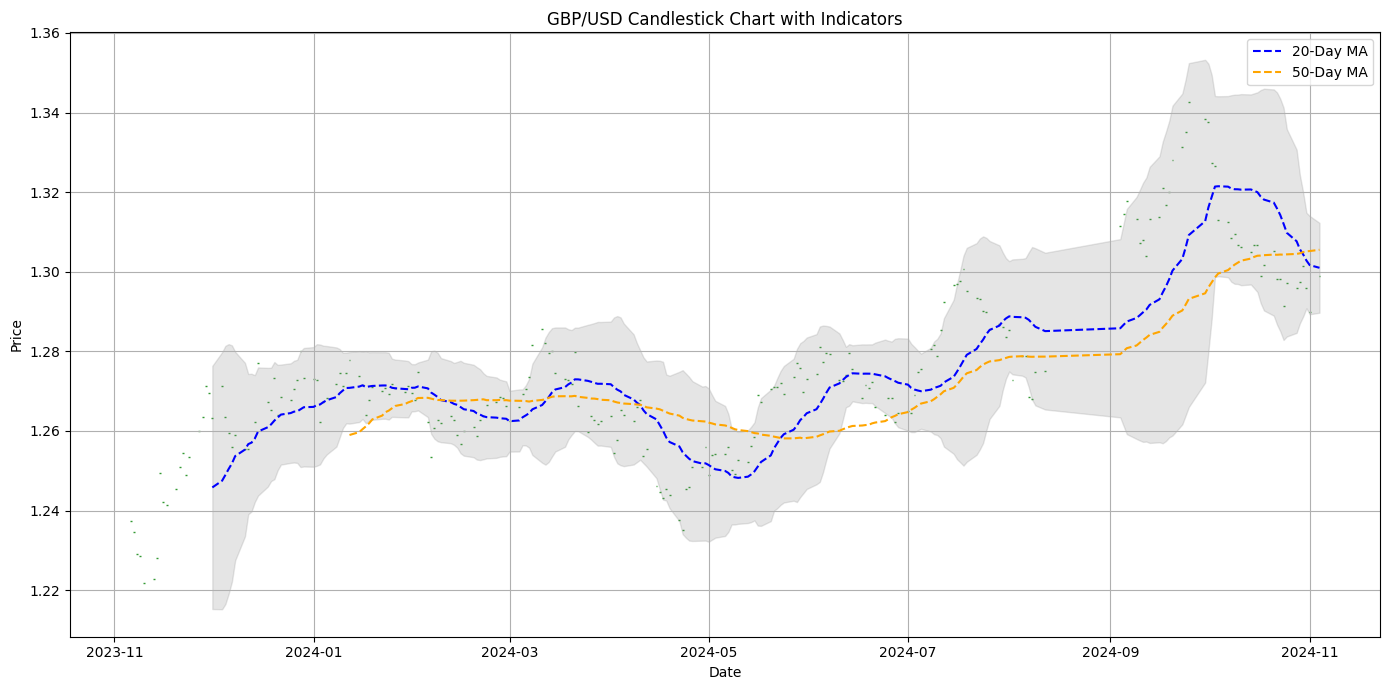

In [27]:
# Install mplfinance
!pip install mplfinance  # Install the mplfinance library for financial plots

# Import necessary libraries
from mplfinance.original_flavor import candlestick_ohlc  # candlestick chart function
import matplotlib.dates as mdates  # Import date formatting utilities for plotting
import matplotlib.pyplot as plt  # Import matplotlib for creating the plot

# Prepare OHLC data (Open, High, Low, Close)
ohlc_data = data[['Close']].resample('D').ohlc().dropna()  # Resample the data to daily frequency and calculate OHLC
ohlc_data.reset_index(inplace=True)  # Reset index to ensure proper date handling
ohlc_data['Date'] = mdates.date2num(ohlc_data['Date'])  # Convert dates to numerical format for mplfinance

# Candlestick Chart
fig, ax = plt.subplots(figsize=(14, 7))
candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='green', colordown='red', alpha=0.8)  # Plot the candlestick chart with custom colors for up and down days

# Overlay Moving Averages (20-day and 50-day)
ax.plot(data.index, data['MA20'], label='20-Day MA', color='blue', linestyle='--')  # Plot the 20-day moving average
ax.plot(data.index, data['MA50'], label='50-Day MA', color='orange', linestyle='--')  # Plot the 50-day moving average

# Bollinger Bands
ax.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='gray', alpha=0.2)

# Formatting
ax.xaxis_date()  # Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Set the x-axis date format to 'Year-Month'
plt.title('GBP/USD Candlestick Chart with Indicators')  # Set the chart title
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.legend()  # Show the legend
plt.grid(True)  # Enable grid lines
plt.tight_layout()  # Adjust layout to avoid clipping of plot elements
plt.show()  # Display the plot


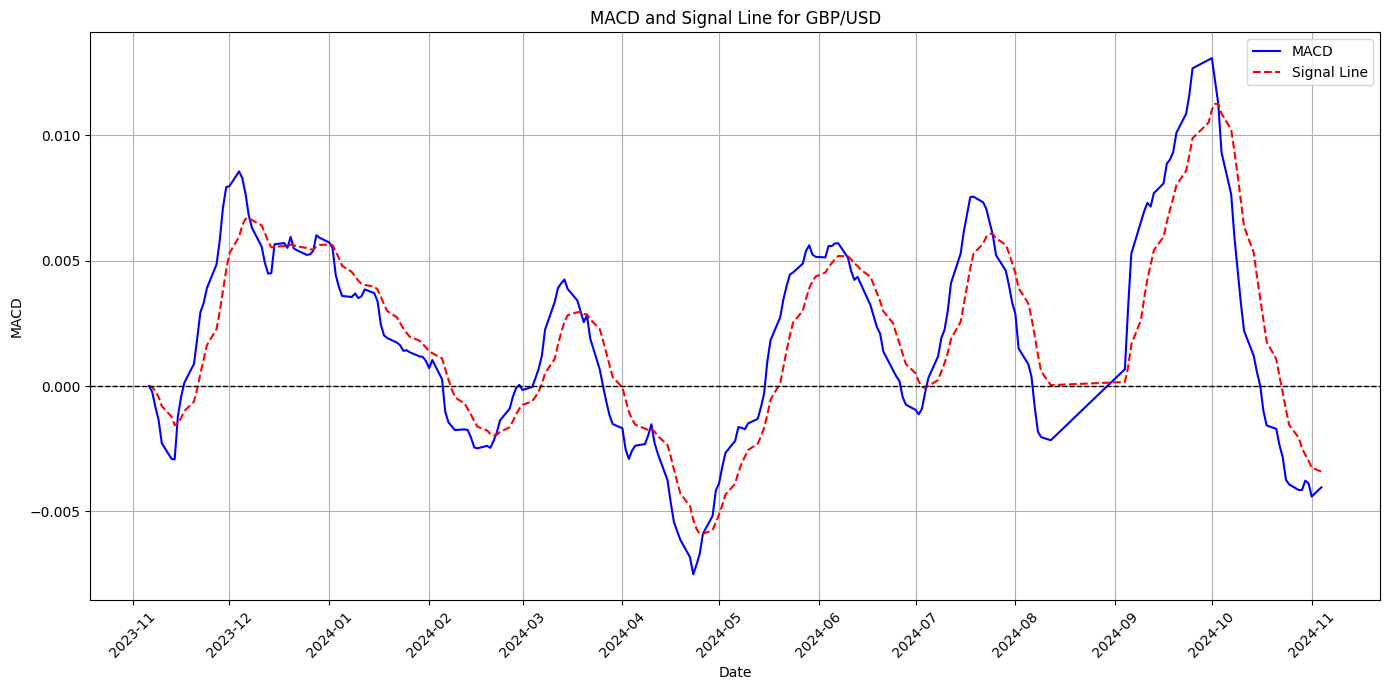

In [28]:
# MACD Calculation
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']  # MACD is the difference between the 12-period EMA and 26-period EMA
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# MACD Chart
plt.figure(figsize=(14, 7))  # Set the figure size for the plot
plt.plot(data.index, data['MACD'], label='MACD', color='blue')  # Plot the MACD line in blue
plt.plot(data.index, data['Signal Line'], label='Signal Line', color='red', linestyle='--')  # Plot the Signal Line in red with dashed style

plt.title('MACD and Signal Line for GBP/USD')  # the plot title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('MACD')  # Label the y-axis
plt.axhline(0, color='black', linestyle='--', linewidth=1)  #  at y=0 for reference
plt.legend()  # y the legend for the plot
plt.grid(True)  # Ene gridlines for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  #x-axis as 'Year-Month'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set the x-axis locator to show a tick every month
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusingt the layout to ensure everything fits within the plot area
plt.show()


<Figure size 1000x600 with 0 Axes>

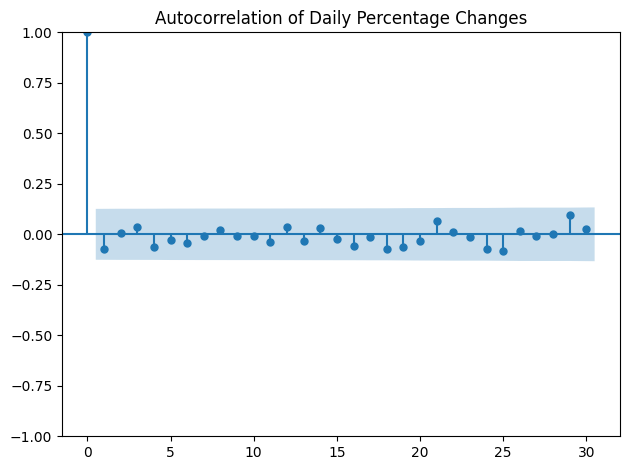

In [32]:
from statsmodels.graphics.tsaplots import plot_acf  # Importiing the autocorrelation plot function

# Autocorrelation of Daily Percentage Changes
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
# Changed column name from 'Daily Change %' to 'Daily Change (%)'
plot_acf(data['Daily Change (%)'].dropna(), lags=30, alpha=0.05)  #  the autocorrelation for the first 30 lags with 5% confidence intervals
plt.title('Autocorrelation of Daily Percentage Changes')  #   title
plt.tight_layout()  #  the layout to ensure everything fits within the plot area
plt.show()  # Displaying the plot
